# Исследование рынка репетиторов по математике (г. Москва)

## Цели исследования:
     Выделить и описать основные группы репетиторов по математике, работающих в г. Москве
     Определить основные факторы, влияющие на цену занятия по математике
     
## Данные:
Данные для исследования представляют собой характеристики репетиторов по математике в городе Москва. 

Источник данных — портал repetit.ru

     ID_repetitor — идентификационный номер репетитора на портале
     price — цена 60 минут занятия
     experience — преподавательский опыт
     age — возраст репетитора
     reviews — количество отзывов о репетиторе
     education — образование репетитора
     video — наличие/отсутствие видеопрезентации о репетиторе
     photo — наличие/отсутствие фотографии репетитора
     diplomas — количество подтвержденных на портале дипломов
     students — количество подобранных учеников у данного репетитора
     years — количество лет после регистрации на портале
     last_activity — дата последней активности
     chapters — преподаваемые репетитором дисциплины 	
     additions — дополнительные преподаваемые дисциплины (ОГЭ (ГИА), ЕГЭ, подготовка к олимпиадам)
     home — район, в котором репетитор принимает у себя	
     out — районы, в который репетитор выезжает
     male — если репетитор мужчина, то male = 1, если женщина, то male = 0
 
Данные собраны 24 марта 2023 года.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import linearmodels as lm
from linearmodels.iv import compare
import re

# 1. Загрузка и предобработка данных

In [2]:
df_women = pd.read_csv('repetitors_women.csv', encoding='windows-1251')
df_men = pd.read_csv('repetitors_men.csv', encoding='windows-1251')
df_men.loc[:, 'male'] = 1 
df_women.loc[:, 'male'] = 0
df = pd.concat([df_women, df_men], axis=0).reset_index(drop=True)
df

,ID_repetitor,price,experience,age,reviews,education,video,photo,diplomas,students,years,last_activity,chapters,additions,home,out,male
0,ID 146553,2 000,10 лет,51 год,26,Образование\n\n\n\nНациональный исследовательс...,0,//img.repetit.ru/teachers/146553/photo/photo_l...,2,40 учеников,подобрано за 4 года,23 марта 2023,"школьный курс, \r\n\r\n ...","ОГЭ (ГИА), \r\n ...",Репетитор не проводит занятия у себя,Выезд из района\nм. Ботанический сад\n(не боле...,0
1,ID 71958,5 000,8 лет,28 лет,27,Образование\n\n\n\nМосковский государственный ...,0,//img.repetit.ru/teachers/71958/photo/photo_lr...,2,41 ученик,подобран за 8 лет,24 марта 2023,"школьный курс, \r\n\r\n ...","ОГЭ (ГИА), \r\n ...",Репетитор не проводит занятия у себя,Выезд из района\nм. Бульвар Дмитрия Донского\n...,0
2,ID 139229,3 000,33 года,56 лет,53,Образование\n\n\n\nМосковский государственный ...,Видеопрезентация,//img.repetit.ru/teachers/139229/photo/photo_l...,7,147 учеников,подобрано за 5 лет,24 марта 2023,"школьный курс, \r\n\r\n ...","ОГЭ (ГИА), \r\n ...",Репетитор не проводит занятия у себя,Выезд из района\nм. Проспект Вернадского\n(не ...,0
3,ID 45006,2 700,41 год,67 лет,12,Образование\n\n\n\nМосковский педагогический г...,0,//img.repetit.ru/teachers/45006/photo/photo_lr...,4,17 учеников,подобрано за 10 лет,11 марта 2023,"школьный курс, \r\n\r\n ...","ОГЭ (ГИА), \r\n ...",м. Домодедовская\n(3 мин. пешком)\n\nОреховый ...,Репетитор не проводит занятия на выезде,0
4,ID 412,2 700,18 лет,43 года,47,Образование\n\n\n\nМосковский государственный ...,0,//img.repetit.ru/teachers/412/photo/photo_lrg....,0,63 ученика,подобрано за 15 лет,24 марта 2023,"школьный курс, \r\n\r\n ...","ОГЭ (ГИА), \r\n ...",Репетитор не проводит занятия у себя,Выезд из района\nм. Ясенево\n(не более 60 мину...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,ID 175986,1 000,3 года,21 год,0,Образование\n\n\n\nФинансовый университет при ...,0,//img.repetit.ru/photo/no_photo.png,0,0 учеников,подобрано за 3 года,03 сентября 2019,"школьный курс, \r\n\r\n ...",ОГЭ (ГИА),Репетитор не проводит занятия у себя,Выезд из района\nм. Водный стадион\n(не более ...,1
11396,ID 225410,700,11 лет,31 год,0,Образование\n\n\n\nНациональный исследовательс...,0,//img.repetit.ru/photo/no_photo.png,0,0 учеников,подобрано за 2 года,06 марта 2023,"школьный курс, \r\n\r\n ...","ОГЭ (ГИА), \r\n ...",м. Марьино\n(20 мин. пешком)\n\nулица Подольск...,Выезд из района\nм. Марьино\nпо договоренности,1
11397,ID 227086,800,3 года,24 года,0,Образование\n\n\n\nМосковский государственный ...,0,//img.repetit.ru/photo/no_photo.png,0,0 учеников,подобрано за 2 года,04 октября 2022,школьный курс,ОГЭ (ГИА),Репетитор не проводит занятия у себя,Выезд из районов:\nм. Электрозаводская\nм. Бау...,1
11398,ID 191623,500,4 года,22 года,0,Образование\n\n\n\nМосковский политехнический ...,0,//img.repetit.ru/photo/no_photo.png,0,0 учеников,подобрано за 3 года,09 февраля 2020,"школьный курс, \r\n\r\n ...",не указаны,Репетитор не проводит занятия у себя,Выезд из районов:\nм. Селигерская\nм. Окружная...,1


## 1.1 Поиск и удаление дупликатов

In [3]:
df.duplicated().sum()

21

In [4]:
df.drop_duplicates(subset='ID_repetitor',  inplace=True)
df = df.reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11379 entries, 0 to 11378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_repetitor   11379 non-null  object
 1   price          11379 non-null  object
 2   experience     11379 non-null  object
 3   age            11379 non-null  object
 4   reviews        11379 non-null  int64 
 5   education      11379 non-null  object
 6   video          11379 non-null  object
 7   photo          11379 non-null  object
 8   diplomas       11379 non-null  int64 
 9   students       11379 non-null  object
 10  years          11379 non-null  object
 11  last_activity  11379 non-null  object
 12  chapters       11379 non-null  object
 13  additions      11379 non-null  object
 14  home           11379 non-null  object
 15  out            11379 non-null  object
 16  male           11379 non-null  int64 
dtypes: int64(3), object(14)
memory usage: 1.5+ MB


## 1.2 Предобработка данных:
    1. Удаление неактивных репетиторов (не появлялись в сети больше полугода)
    2. Приведение переменных price, experience, age, reviews, diplomas, students, years в числовой формат
    3. Присваивание переменным photo и video значение 1 при наличии фото/видео или присваивание 0 при отсутствии
    4. В ячейках chapters и additions остаются только названия преподаваемых дисциплин

In [6]:
df.drop(df[df['last_activity'] == '-'].index, inplace=True)

df['last_activity_day'] = df['last_activity'].apply(lambda x: x.split()[0]).astype(int)
df['last_activity_month'] = df['last_activity'].apply(lambda x: x.split()[1])
df['last_activity_year'] = df['last_activity'].apply(lambda x: x.split()[2]).astype(int)

df = df[((df['last_activity_year'] == 2022) & (df['last_activity_month'].isin(['сентября', 'ноября', 'декабря']))) | 
                  ((df['last_activity_year'] == 2023) & (df['last_activity_month'].isin(['января', 'февраля', 'марта'])))]

df = df.drop(['last_activity_day', 'last_activity_month', 'last_activity_year', 'last_activity'], axis=1)

In [7]:
df['ID_repetitor'] = df['ID_repetitor'].astype(str).str.replace('ID', '').replace(' ', '').astype(int)
df['price'] = df['price'].astype(str).str.replace(' ', '').astype(int)
df['experience'] = df['experience'].astype(str).str.replace(r'\b(лет|года|год)\b', '', regex=True).str.replace(' ', '').astype(int)
df['age'] = df['age'].astype(str).str.replace('лет', '').str.replace('года', '').str.replace('год', '').astype(int)
df['students'] = df['students'].astype(str).str.replace(r'\b(учеников|ученика|ученик)\b', '', regex=True).str.replace(' ', '').astype(int)
df['years'] = df['years'].astype(str).str.replace(r'\b(подобрано|подобран|за|лет|года|год)\b', '', regex=True)
df['years'] = df['years'].apply(lambda x: str(float(x.split()[0])/12) if 'месяц' in x else x)
df['years'] = pd.to_numeric(df['years'], errors='coerce')
df['video'].fillna(0, inplace=True)
df['diplomas'].fillna(0, inplace=True)
df['video'].replace('Видеопрезентация', 1, inplace=True)
df['photo'].replace('//img.repetit.ru/photo/no_photo.png', 0, inplace=True)
df.loc[df['photo'] != 0, 'photo'] = 1
df['video'] = df['video'].astype(int)
df['photo'] = df['photo'].astype(int)

In [8]:
df['chapters'] = df['chapters'].str.replace('\r', '')
df['chapters'] = df['chapters'].str.replace('\n', '')
df['additions'] = df['additions'].str.replace('\r', '')
df['additions'] = df['additions'].str.replace('\n', '')
df['home'] = df['home'].str.replace('\n', '')
df['out'] = df['out'].str.replace('\n', '')
df['out'] = df['out'].str.replace('Выезд из района', '')
df['out'] = df['out'].str.replace('Выезд из районов', '')
df['out'] = df['out'].str.replace('Выезд только в районы', '')
df['education'] = df['education'].str.replace('Образование', '')
df['education'] = df['education'].str.replace('\n', ' ')

## 1.3 Создание дополнительных переменных:
    EGE = 1, если репетитор готовит к ЕГЭ по математике, иначе EGE = 0
    olimpiads = 1, если репетитор готовит к олимпиадам по математике, иначе olimpiads = 0
    top_university = 1, если репетитор закончил университет, входящий в топ-10 российских вузов с математической подготовкой (https://raex-rr.com/education/Russian_universities_by_directions/math/2020) + выпускники Московского педагогического государственного университета, иначе top_university = 0 
    students_per_year — количество учеников, подобранных репетитором за один год
Затем удаляются все репетиторы, которые не подобрали ни одного ученика на протяжении полугода

In [9]:
df['EGE'] = df['additions'].apply(lambda x: 1 if 'ЕГЭ' in x else 0)
df['olimpiads'] = df['additions'].apply(lambda x: 1 if 'подготовка к олимпиадам' in x else 0)
df['higher_math'] = df['chapters'].apply(lambda x: 1 if 'линейная алгебра' in x 
                                       or 'математический анализ' in x
                                       or 'высшая математика' in x
                                       or 'аналитическая геометрия' in x
                                       or 'теория вероятностей' in x
                                       or 'дифференциальные уравнения' in x
                                       or 'линейная геометрия' in x
                                       or 'комбинаторика' in x
                                       or 'алгебра логики' in x
                                       or 'аналитическая геометрия' in x
                                       or 'математическая статистика' in x
                                       or 'математическая логика' in x
                                       or 'интегральные уравнения' in x
                                       or 'дискретная математика' in x
                                       or 'уравнения в частных производных' in x
                                       or 'теория чисел' in x
                                       or 'векторный анализ' in x
                                       or 'финансовая математика' in x
                                       or 'теория игр' in x
                                       or 'ТФКП' in x
                                       or 'прикладная математика' in x
                                       or 'теория графов ' in x
                                       or 'дифференциальная геометрия' in x
                                       or 'вычислимые функции' in x
                                       or 'актуарная математика' in x
                                       or 'математическая физика' in x
                                       or 'методы оптимизации' in x
                                       or 'эконометрика' in x
                                       or 'уравнения математической физики' in x
                                       or 'методы оптимальных решений' in x
                                       or 'математические модели' in x
                                       or 'численные методы' in x
                                       or 'линейное программирование' in x
                                       or 'функциональный анализ' in x
                                       or 'вариационное исчисление' in x
                                       or 'теоретическая механика' in x
                                       or 'сопромат' in x
                                       or 'топология' in x
                                       or 'теория оптимизации' in x
                                       or 'оптимальное управление' in x
                                       or 'тензорный анализ' in x
                                       or 'теория приближений' in x
                                       else 0)

In [10]:
df['top_university'] = df['education'].apply(lambda x: 1 if 'Московский государственный университет имени М.В. Ломоносова ' in x
                                       or 'МГУ' in x
                                       or 'Московский физико-технический институт' in x
                                       or 'МФТИ' in x
                                       or 'Санкт-Петербургский государственный университет' in x
                                       or 'Высшая школа экономики' in x
                                       or 'Московский инженерно-физический институт' in x
                                       or 'МИФИ' in x
                                       or 'Новосибирский национальный исследовательский государственный университет' in x
                                       or 'Московский государственный технический университет имени Н.Э. Баумана' in x
                                       or 'МГТУ' in x
                                       or 'Финансовый университет при Правительстве Российской Федерации ' in x
                                       or 'МИСиС' in x
                                       or 'Московский авиационный институт' in x
                                       or 'Московский педагогический государственный университет' in x
                                       else 0)

In [11]:
df['students_per_year'] = df['students'] / df['years'] 
df.drop(df[(df['students_per_year'] == 0) & (df['years'] > 0.5)].index, inplace=True)
df = df.reset_index(drop=True)

# 2. Описательные статистики и графики распределений

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_repetitor,3565.0,143825.976438,90824.172356,102.000000,62350.000000,139998.00,222159.0,290351.0
price,3565.0,1319.453015,628.776678,300.000000,1000.000000,1200.00,1500.0,9350.0
experience,3565.0,13.228612,11.659097,0.000000,4.000000,10.00,19.0,59.0
age,3565.0,37.116410,16.490761,18.000000,24.000000,31.00,50.0,86.0
reviews,3565.0,8.547546,14.374297,0.000000,1.000000,3.00,10.0,187.0
video,3565.0,0.044039,0.205211,0.000000,0.000000,0.00,0.0,1.0
photo,3565.0,0.930154,0.254923,0.000000,1.000000,1.00,1.0,1.0
diplomas,3565.0,1.183170,2.271511,0.000000,0.000000,0.00,2.0,35.0
students,3565.0,13.478261,22.174112,0.000000,1.000000,5.00,16.0,299.0
years,3565.0,5.400748,4.144072,0.083333,2.000000,5.00,9.0,15.0


На рынке репетиторов в г. Москва действуют 3565 активных репетиторов по математике, работающих на платформе repetit.ru.

Медианный репетитор по математике — это женщина возрастом 31 год со стажем работы 10 лет, не являющаяся выпускницей топового университета, которая готовит к ЕГЭ, но не преподает высшую математику и не готовит к математическим олимпиадам. На её странице repetit.ru опубликована фотография (но не опубликована видеопрезентация), подтверждено 0 дипломов, имеется 3 отзыва. Через портал она подбирает 1.25 учеников в год. Ее занятие стоит 1200 рублей в час.

Средние значения большинства переменных превышают медианные значения, что говорит о положительной асимметрии выборки, то есть существуют репетиторы, характеристики которых существенно превышают характеристики других (например, необычайно высокая цена занятия, или очень почтенный возраст репетитора)

(0.0, 100.0)

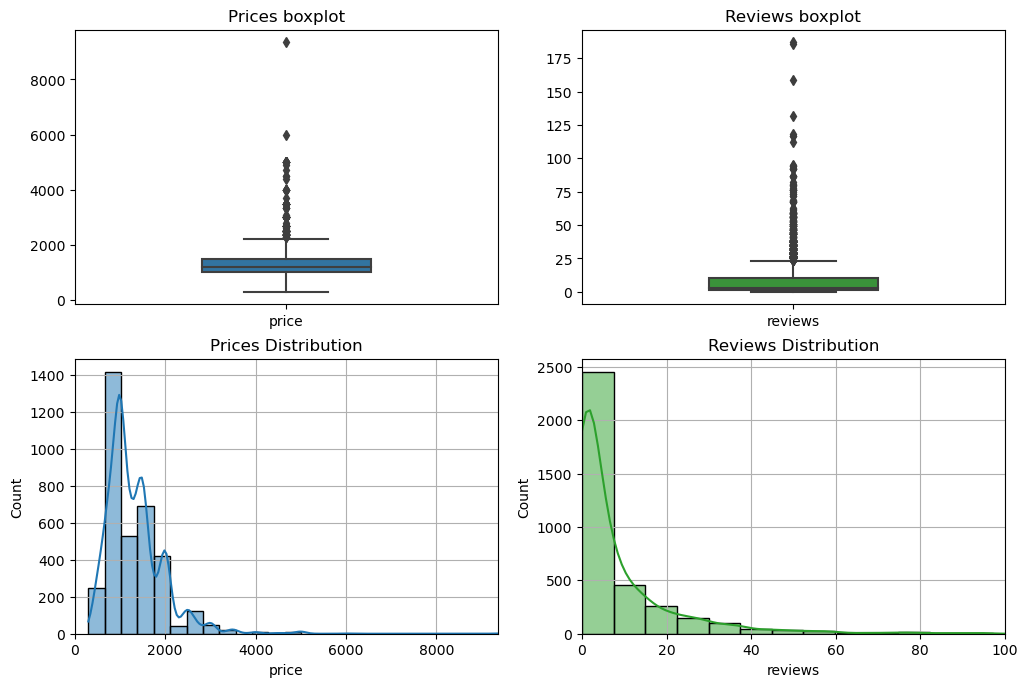

In [30]:
fig1 = plt.figure(figsize=(12, 8), dpi=100)

fig1.add_subplot(2, 2, 1)
plt.title('Prices boxplot')
sns.boxplot(data=df[['price']], color='C0', width=0.4)

fig1.add_subplot(2, 2, 3)
plt.title('Prices Distribution')
sns.histplot(df['price'], bins=25, color='C0', kde=True)
plt.grid(True)
plt.xlim([0, df['price'].max()])

fig1.add_subplot(2, 2, 2)
plt.title('Reviews boxplot')
sns.boxplot(data=df[['reviews']], color='C2', width=0.4)

fig1.add_subplot(2, 2, 4)
plt.title('Reviews Distribution')
sns.histplot(df['reviews'], bins=25, color='C2', kde=True)
plt.grid(True)
plt.xlim([0, 100])

(0.0, 86.0)

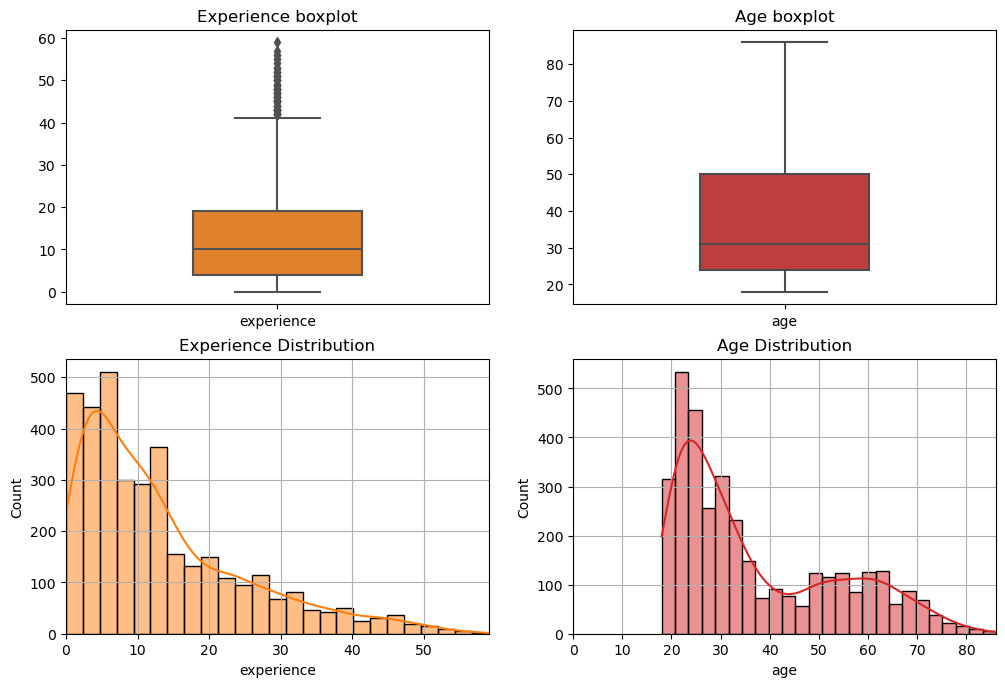

In [14]:
fig2 = plt.figure(figsize=(12, 8), dpi=100)

fig2.add_subplot(2, 2, 1)
plt.title('Experience boxplot')
sns.boxplot(data=df[['experience']], color='C1', width=0.4)

fig2.add_subplot(2, 2, 3)
plt.title('Experience Distribution')
sns.histplot(df['experience'], bins=25, color='C1', kde=True)
plt.grid(True)
plt.xlim([0, df['experience'].max()])

fig2.add_subplot(2, 2, 2)
plt.title('Age boxplot')
sns.boxplot(data=df[['age']], color='C3', width=0.4)

fig2.add_subplot(2, 2, 4)
plt.title('Age Distribution')
sns.histplot(df['age'], bins=25, color='C3', kde=True)
plt.grid(True)
plt.xlim([0, df['age'].max()])

(0.0, 100.0)

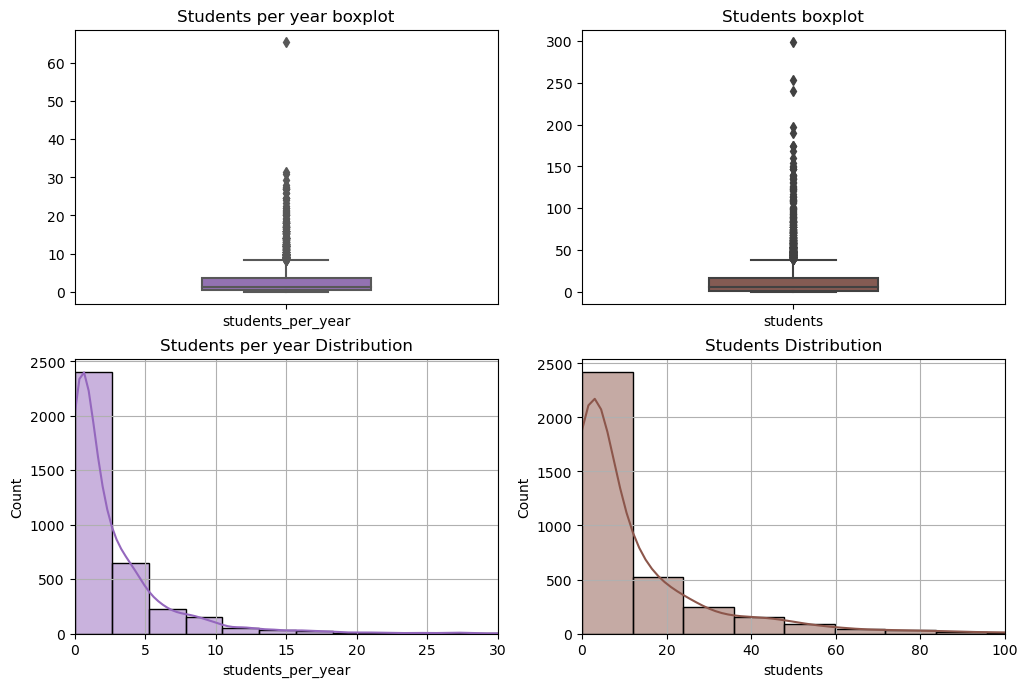

In [15]:
fig1 = plt.figure(figsize=(12, 8), dpi=100)

fig1.add_subplot(2, 2, 1)
plt.title('Students per year boxplot')
sns.boxplot(data=df[['students_per_year']], color='C4', width=0.4)

fig1.add_subplot(2, 2, 3)
plt.title('Students per year Distribution')
sns.histplot(df['students_per_year'], bins=25, color='C4', kde=True)
plt.grid(True)
plt.xlim([0, 30])

fig1.add_subplot(2, 2, 2)
plt.title('Students boxplot')
sns.boxplot(data=df[['students']], color='C5', width=0.4)

fig1.add_subplot(2, 2, 4)
plt.title('Students Distribution')
sns.histplot(df['students'], bins=25, color='C5', kde=True)
plt.grid(True)
plt.xlim([0, 100])

Результаты анализа описательных статистик и графическая иллюстрация распределений количественных переменных свидетельствуют о возможном наличии нескольких различных групп репетиторов.

# 3. Преподаваемые предметы

In [16]:
text1 = ', '.join(df['chapters'].tolist() + df['additions'].tolist())
words1 = [word.strip() for word in text1.split(',')]
word_counts1 = pd.Series(words1).value_counts()

print(word_counts1)

школьный курс                      3510
ОГЭ (ГИА)                          2953
алгебра                            2945
геометрия                          2809
ЕГЭ                                2309
подготовка к олимпиадам             798
тригонометрия                       707
линейная алгебра                    686
математический анализ               671
высшая математика                   620
аналитическая геометрия             542
не указаны                          539
теория вероятностей                 488
дифференциальные уравнения          433
комбинаторика                       286
математическая статистика           253
алгебра логики                      251
линейная геометрия                  240
интегральные уравнения              207
математическая логика               195
на английском языке                 181
дискретная математика               161
уравнения в частных производных     161
векторный анализ                    157
ТФКП                                150


Практически все репетиторы преподают программу школьного курса (98% репетиторов), а также большинство репетиторов готовят к выпускным экзаменам ОГЭ (82%) и ЕГЭ (64%). Достаточно много репетиторов занимаются такими разделами математики из старшей школы как алгебра (82%), геометрия (79%) и тригонометрия (20%). Из разделов высшей математики репетиторы наиболее часто преподают линейную алгебру (19%) и математический анализ (18%), наиболее редко топологию и теорию приближений (по 1%).

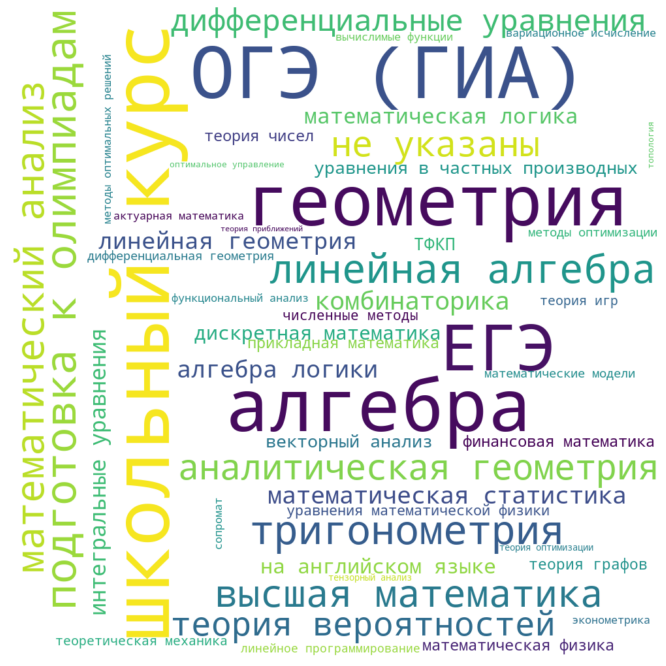

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000, min_font_size = 2, 
                      background_color='white').generate_from_frequencies(word_counts1)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 4. Распределение репетиторов по топовым университетам

In [18]:
UNIVERSITY_NAMES = ['Московский государственный университет имени М.В. Ломоносова', 'МГУ', 'Московский физико-технический институт',
                    'МФТИ', 'Санкт-Петербургский государственный университет','Высшая школа экономики',
                    'Московский инженерно-физический институт','МИФИ',
                    'Новосибирский национальный исследовательский государственный университет',
                    'Московский государственный технический университет имени Н.Э. Баумана' ,'МГТУ' ,
                    'Финансовый университет при Правительстве Российской Федерации ', 'МИСиС', 'Московский авиационный институт',
                    'Московский педагогический государственный университет']

def extract_university_names(text):
    pattern = r'\b(' + '|'.join(UNIVERSITY_NAMES) + r')\b'
    matches = re.findall(pattern, text, flags=re.IGNORECASE)
    return matches

df['university_from_top_list'] = df['education'].apply(extract_university_names)

for i in range(len(df)):
    df.at[i, 'university_from_top_list'] = ', '.join(df.at[i, 'university_from_top_list'])

for i in range(len(df)):
    if df.loc[i, 'university_from_top_list'] == '':
        df.loc[i, 'university_from_top_list'] = 'Не топовый университет'       

In [19]:
df['university_from_top_list'] = df['university_from_top_list'].apply(lambda x: x.lower())
df['university_from_top_list'] = df['university_from_top_list'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))

In [20]:
df['university_from_top_list'] = df['university_from_top_list'].replace('московский государственный университет имени м.в. ломоносова', 'МГУ', regex=True)
df['university_from_top_list'] = df['university_from_top_list'].replace('мгу', 'МГУ', regex=True)
df['university_from_top_list'] = df['university_from_top_list'].replace('мфти', 'МФТИ (Физтех)', regex=True)
df['university_from_top_list'] = df['university_from_top_list'].replace('московский физико-технический институт', 'МФТИ (Физтех)', regex=True)
df['university_from_top_list'] = df['university_from_top_list'].replace('московский инженерно-физический институт','МИФИ', regex=True)
df['university_from_top_list'] = df['university_from_top_list'].replace('мифи','МИФИ', regex=True)
df['university_from_top_list'] = df['university_from_top_list'].replace('московский государственный технический университет имени н.э. баумана' ,'МГТУ имени Н.Э. Баумана', regex=True)
df['university_from_top_list'] = df['university_from_top_list'].replace('мгту', 'МГТУ имени Н.Э. Баумана', regex=True)

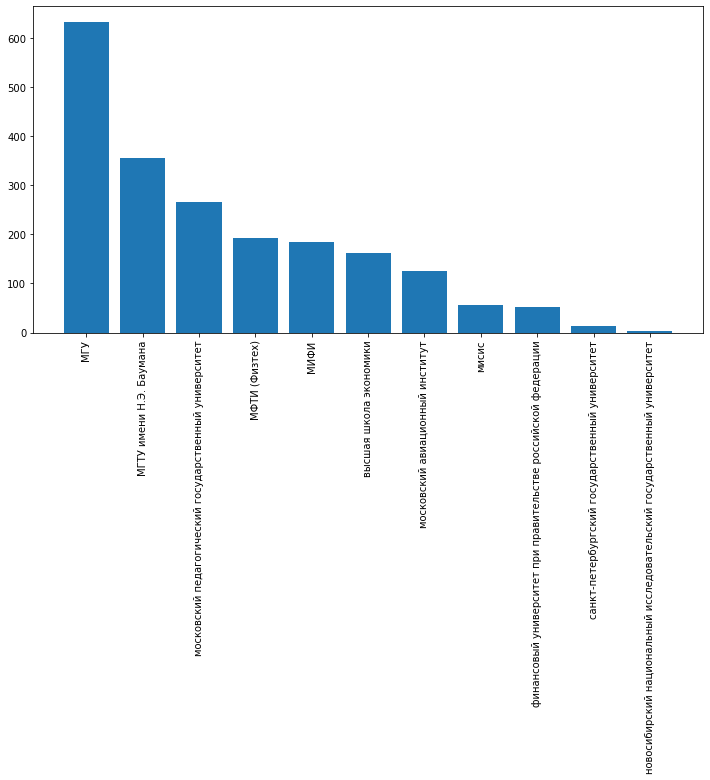

In [21]:
text_university = ', '.join(df['university_from_top_list'].tolist())
words_university = [word.strip() for word in text_university.split(',')]
word_counts_university = pd.Series(words_university).value_counts()

plt.figure(figsize=(12, 6))
plt.bar(word_counts_university[1:].index, word_counts_university[1:].values)
plt.xticks(rotation=90)
plt.show()

Наибольшее число репетиторов по математике получили образование в МГУ имени М.В. Ломоносова. Наименьшее число репетиторов из числа выпускников топовых вузов закончили СПбГУ и НГУ, что объясняется удаленностью этих университетов от Москвы.

# 5. Анализ ценообразования на рынке репетиторов по математике

На платформе repetit.ru репетиторы сами назначают цену на занятие исходя из собственных соображений. Однако, предполагается, что на выбираемую стоимость урока влияют некоторые объективные и сигнальные факторы:
1. Объективные переменные:
    * Опыт работы
    * Возможность преподавания ЕГЭ, олимпиадной и высшей математики
    * Возможность выезда на занятие в любой район
    
    
2. Сигнальные переменные:
    * Количество отзывов
    * Наличие на странице фото или видео
    * Образование топового университета
    * Количество подтвержденных дипломов
    
Также проверяется гипотеза, что женщины и мужчины назначают различные цены занятия.

Таким образом, итоговая модель образования цены:

price = β0 + β1*experience + β2*experience^2 + β3*reviews + β4*video + β5*diplomas + β6*photo + β7*EGE + β8*olimpiads + β9*higher_math + β10*top_university + β11*any_neighborhood + β12*male + ε, где ε — нормально распределенная случайная ошибка.

Оценка производится с помощью метода наименьших квадратов.

In [22]:
df['experience_square'] = df['experience']**2
df['any_neighborhood'] = df['out'].apply(lambda x: 1 if 'в любой район' in x else 0)
formula = 'price ~ experience + experience_square + reviews + video + diplomas + photo + EGE + olimpiads + higher_math + top_university + any_neighborhood + male'
prices_OLS = sm.formula.ols(formula, data = df).fit(cov_type='HC3')
print(prices_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     81.26
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          5.54e-177
Time:                        00:11:46   Log-Likelihood:                -27534.
No. Observations:                3565   AIC:                         5.509e+04
Df Residuals:                    3552   BIC:                         5.517e+04
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           483.3087     37.78

In [31]:
formula = 'price ~ experience + experience_square + reviews + video + diplomas + photo + EGE + olimpiads + higher_math + top_university'
prices_OLS = sm.formula.ols(formula, data = df).fit(cov_type='HC3')
print(prices_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     93.87
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.04e-172
Time:                        01:03:44   Log-Likelihood:                -27536.
No. Observations:                3565   AIC:                         5.509e+04
Df Residuals:                    3554   BIC:                         5.516e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           465.4152     34.97

По результатам оценивания модели можно сделать вывод, что значимыми для ценообразования факторами оказались все, кроме пола и возможности выезда на занятие в любой район Москвы.  

## Вклад сигнальных факторов в ценообразование

Из сигнальных факторов наиболее значимо повышают цену занятия наличие фото и видео: репетитор с фотографией на странице устанавливает цену на занятие в среднем на 261 рубль выше, чем репетитор без фотографии; репетитор с видеовизиткой устанавливает цену на занятие в среднем на 395 рублей выше, чем репетитор без нее. За каждый дополнительный отзыв репетитор повышает цену занятия в среднем на 3 рубля, а за каждый дополнительный верифицированный диплом - на 42 рубля.

Таким образом, сигнальные факторы значимо положительно влияют на цену занятия. Почему так происходит? Возможное объяснение состоит в том, что подавая сигнал (фото, видео, подтвержденные дипломы), репетитор сообщает потенциальным ученикам о своем профессионализме и честности. При этом сигналы, подаваемые другими учениками в виде отзывов, укрепляют репутацию репетитора. Все эти факторы создают заочное доверие между потенциальными учениками и репетитором, что снижает возможные риски взаимодействия между ними, а значит уменьшает и премию за риск для ученика. Так как аналогом премии за риск в данном случае является дисконт со стороны репетитора, то уменьшение риска влечет за собой естественное увеличение стоимости занятия.

## Вклад объективных факторов в ценообразование

Объективные факторы также вносят значительный вклад в стоимость занятия: репетитор, преподающий олимпиадную математику устанавливает цену в среднем на 187 рублей выше, чем репетитор, не преподающий олимпиадную математику; репетитор, который готовит к ЕГЭ, в среднем назначает цену на 180 рублей выше, чем репетитор, который не готовит к ЕГЭ; репетитор, который преподает высшую математику, в среднем назначает цену на 102 рубля выше, чем репетитор, который преподает высшую математику. 

Преподавательский опыт вносит вклад в назначаемую цену по следующей квадратичной зависимости: 

price = const + 34.8235*experience - 0.6501*experience^2

График данной зависимости при const = 0 изображен ниже:

Экстремум функции price = const + 34.8235*experience - 0.6501*experience^2:
experience = 26.7831872019689, price = 466.342159763883


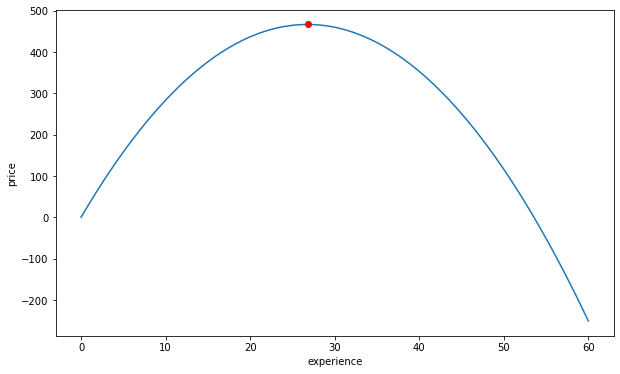

In [23]:
import sympy as sp

x = sp.Symbol('x')
y = 34.8235*x - 0.6501*x**2

extremum = sp.solve(sp.diff(y, x), x)

print(f"Экстремум функции price = const + 34.8235*experience - 0.6501*experience^2:\nexperience = {extremum[0]}, price = {y.subs(x, extremum[0])}")

plt.figure(figsize=(10, 6))

x_vals = np.linspace(0, 60, 1000)
y_vals = [y.subs(x, i) for i in x_vals]

plt.plot(x_vals, y_vals)

plt.plot(extremum[0], y.subs(x, extremum[0]), 'ro')

plt.xlabel("experience")
plt.ylabel("price")

plt.show()

Таким образом можно утверждать, что у репетитора по метематики существует "пик карьеры": при увеличении преподавательского опыта до 27 лет стоимость занятия увеличивается, однако после этого порога репетитор начинает снижать стоимость занятия. На "пике карьеры" репетитор устанавливает цену занятия в среднем на 466 рублей выше, чем репетитор без опыта работы.

Данный на первый взгляд парадоксальный результат можно объяснить, например, следующем образом: репетиторы с опытом работы больше 27 лет — это, вероятно, немолодые школьные или вузовские преподаватели, которые уже имеют основную работу и используют репетиторство как дополнительный источник дохода. Поэтому такие люди не устанавливают слишком высокую цену за занятие.

# 6. Анализ основных групп репетиторов по математике

Для идентификации основных групп репетиторов используется клатерный анализ методом k-средних. 

Качество кластеризации определяется с помощью метода силуэта.

Силуэт - это мера того, насколько объект похож на свой кластер по сравнению с другими кластерами. Для каждого объекта этот коэффициент рассчитывается следующим образом:

a. Вычисляется среднее расстояние между текущим объектом и всеми другими объектами в том же кластере (коэффициент "а").

b. Вычисляется среднее расстояние между текущим объектом и всеми объектами в ближайшем кластере (коэффициент "b").

c. Вычисляется коэффициент силуэта как (b - a) / max(a, b).

Данные шаги повторяются для различного числа кластеров и выбирается такое количество кластеров, при котором значение коэффициента силуэта максимально.

In [24]:
df_clustering = df.drop(['ID_repetitor', 'chapters', 'additions', 'education', 'home', 'out', 'home', 
                         'out', 'university_from_top_list'], axis=1)

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

Оптимальное количество кластеров: 3


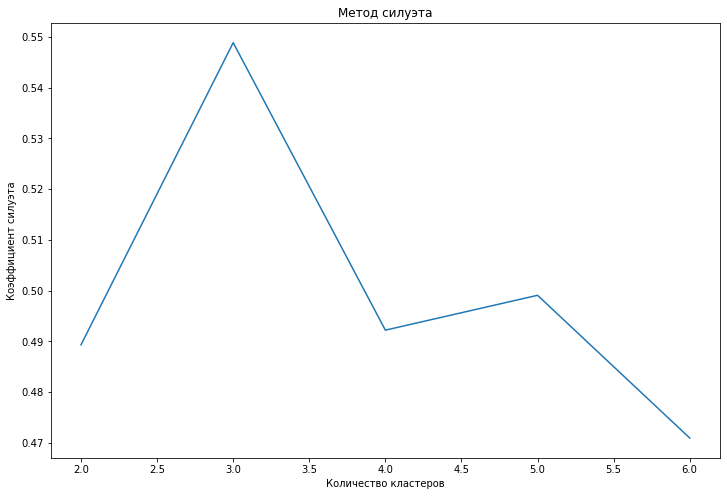

In [26]:
k_range = range(2, 7)

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_clustering)
    silhouette_avg = silhouette_score(df_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

max_score_index = silhouette_scores.index(max(silhouette_scores))
print("Оптимальное количество кластеров:", k_range[max_score_index])

plt.figure(figsize=(12,8))
plt.plot(k_range, silhouette_scores)
plt.title("Метод силуэта")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
df['cluster'] = kmeans.labels_
df.groupby('cluster').mean().T

cluster,0,1,2
ID_repetitor,86165.662053,90129.025140,173405.036752
price,1407.554787,1833.240223,1208.205128
experience,28.892734,16.025140,6.997009
age,58.964245,41.594972,28.336325
reviews,9.414072,38.581006,3.631624
video,0.016148,0.245810,0.023504
photo,0.799308,0.986034,0.970085
diplomas,1.033449,2.416201,1.050000
students,15.173010,59.983240,5.735470
years,8.071799,7.758613,4.050356


In [28]:
print("Количество людей в каждой группе:")
df.groupby('cluster')['cluster'].size()

Количество людей в каждой группе:


cluster
0     867
1     358
2    2340
Name: cluster, dtype: int64

Таким образом среди репетиторов по математики отчетливо выделяются три группы:

## Группа 1: пожилые преподаватели

Средний возраст и стаж работы для репетитора из данной группы составляют 59 и 29 лет соответственно. Предположительно, большинство из них являются школьными или университетскими преподавателями. Средний репетитор из данной группы — это женщина, которая готовит школьников к ЕГЭ, но не готовит к олимпиадам и не обучает высшей математике. Она набирает в среднем 2 ученика в год и устанавливает цену за занятие 1407 рублей. Пожилые преподаватели — это группа с наименьшем среди других групп количеством выпускников топовых вузов и наименьшим количеством репетиторов, выезжающих на занятие в любой район Москвы.

## Группа 2: профессиональные репетиторы

Наиболее малочисленной группой являются специалисты со средний возрастом и стажем работы 42 и 16 лет соответственно. Предположительно, большинство из них являются профессиональными репетиторами, то есть людьми, чей основной источник дохода — это репетиторство. В данной группе примерно равное количество мужчин и женщин. Средний репетитор из данной группы готовит к ЕГЭ и к высшей математике. Он набирает в среднем 9 учеников в год и устанавливает цену за занятие 1833 рубля. Профессиональные репетиторы обладают самым высоким среди других групп количеством отзывов, количеством подтвержденных дипломов; они наиболее часто являются выпускниками топовых вузов, чаще других готовят к олимпиадам. Также почти все видеопрезентации на портале выкладывают именно профессиональные репетиторы.

## Группа 3: студенты и недавние выпускники

Наиболее многочисленная среди трех групп. Средний возраст и стаж работы для репетитора из данной группы составляют 28 и 7 лет соответственно. Предположительно, для данной группы репетиторов занятия являются подработкой во время учебы, или временной работой на начальном этапе карьеры. Средний репетитор из данной группы — это женщина, выпускница или студентка топового университета, которая готовит школьников к ЕГЭ, но не готовит к олимпиадам и не обучает высшей математике. Она набирает в среднем 2 ученика в год и устанавливает цену за занятие 1208 рублей. Репетиторы из данной группы наиболее часто выезжают на занятия в любой район Москвы, что, вероятно, является их конкурентным преимуществом перед более опытными специалистами из двух других групп.

# Основные выводы:

Был проведен анализ рынка репетиторов по математике в городе Москва. Источник данных — портал repetit.ru

После удаления из выбоки неактивных репетиторов было выяснено, что по состоянию на 24 марта 2023 года в г. Москва на платформе repetit.ru работают 3565 репетиторов по математике. Медианный репетитор — это женщина возрастом 31 год со стажем работы 10 лет.

Практически все репетиторы преподают программу школьного курса (98% репетиторов), а также большинство репетиторов готовят школьников к выпускным экзаменам ОГЭ (82%) и ЕГЭ (64%). 

Было выяснено, что всех репетиторов по математике можно объединить в три различные группы: пожилые преподаватели, профессиональные репетиторы, а также студенты и недавние выпускники. Наибольшую среднюю стоимость занятия устанавливают профессиональные репетиторы (1833 рубля за 60 минут), а наименьшую — студенты и выпускники (1208 рублей за 60 минут).

На стоимость занятия, которую устанавливают репетиторы, также влияют следующие факторы: возможность преподавания ЕГЭ, олимпиадной и высшей математики, количество отзывов, наличие на странице repetit.ru фото или видео, образование топового университета, количество подтвержденных дипломов, опыт работы. Было также показано существование у репетиторов по математике "карьерного пика".

В целом, методология, представленная в данном исследовании, является достаточно универсальной и поэтому может быть применена для анализа других репетиторов, в том числе работающих на других платформах.